# EDA OF BIKE SHARE PROJECT

The objective of this project is to construct and train a regression model using the Capital Bike Share data from Washington, D.C.

In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
bike = pd.read_csv("./data/bike_train.csv", index_col=0, parse_dates=True)
bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bike.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Weather 4 has only one value so we will drop it. 

In [4]:
bike["weather"].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [7]:
bike=bike.drop(bike[bike["weather"]==4].index)


In [8]:
bike.weather.value_counts()

weather
1    7192
2    2834
3     859
Name: count, dtype: int64

We've added a new column to help us understand which days see higher bike rental activity.

In [9]:
bike['dow_label'] = bike.index.day_name()
bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dow_label
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday


In [10]:
bike['day_of_week'] = bike.index.weekday + 1
bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dow_label,day_of_week
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday,6
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday,6
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday,6
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday,6
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday,6


In [11]:
# Resampling the data to days instead of hours.
bike.columns
ds_bike = bike[['casual', 'registered', 'count']].resample('D').sum()
ds_bike.head()


,casual,registered,count
datetime,,,
2011-01-01,331,654,985
2011-01-02,131,670,801
2011-01-03,120,1229,1349
2011-01-04,108,1454,1562
2011-01-05,82,1518,1600


In [13]:
bike['year'] = bike.index.year  
bike['month'] = bike.index.month  
bike['day'] = bike.index.day  
bike["hour"] = bike.index.hour
bike.tail(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dow_label,day_of_week,year,month,day,hour
datetime,,,,,,,,,,,,,,,,,
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wednesday,3,2012,12,19,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Wednesday,3,2012,12,19,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,Wednesday,3,2012,12,19,23


In [14]:
bike.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'dow_label',
       'day_of_week', 'year', 'month', 'day', 'hour'],
      dtype='object')

### Monthly Rentals

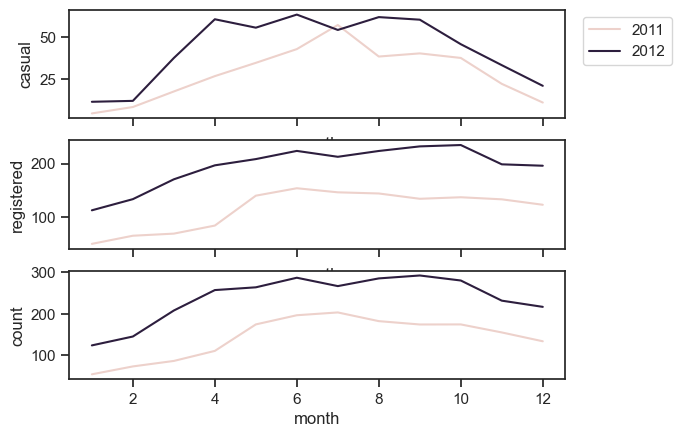

In [37]:
sns.set_theme(style="ticks")
fig, axs = plt.subplots(nrows=3)


cas = sns.lineplot(x="month", y="casual", data=bike, hue="year", errorbar=None, ax=axs[0])
#cas.set_ylim(0, 350)
cas.set(xticklabels=[])
cas.legend(bbox_to_anchor=(1.02, 1), loc="upper left")

reg =sns.lineplot(x="month", y="registered", data=bike, hue="year", errorbar=None, ax=axs[1], legend=False)
#reg.set_ylim(0, 350)
reg.set(xticklabels=[])

cou =sns.lineplot(x="month", y="count", data=bike, hue="year", errorbar=None, ax=axs[2], legend=False)
#cou.set_ylim(0, 350)


### Hourly Rentals

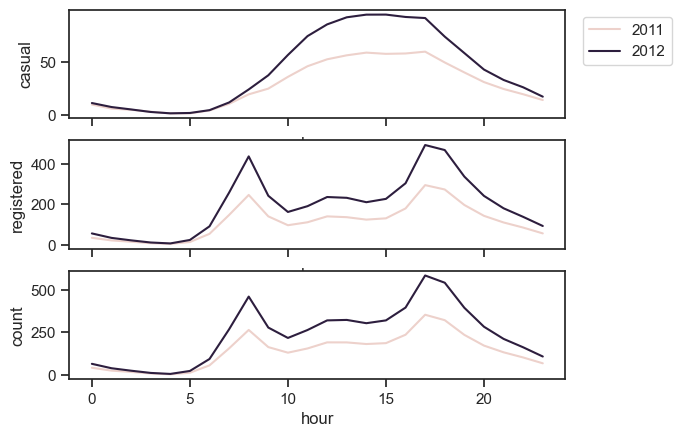

In [34]:
sns.set_theme(style="ticks")
fig, axs = plt.subplots(nrows=3)

cas = sns.lineplot(x="hour", y="casual", data=bike, hue="year", errorbar=None, ax=axs[0])
#cas.set_ylim(0, 500)
cas.set(xticklabels=[])
cas.legend(bbox_to_anchor=(1.02, 1), loc="upper left")

reg =sns.lineplot(x="hour", y="registered", data=bike, hue="year", errorbar=None, ax=axs[1], legend=False)
#reg.set_ylim(0, 500)
reg.set(xticklabels=[])

cou =sns.lineplot(x="hour", y="count", data=bike, hue="year", errorbar=None, ax=axs[2], legend=False)
#cou.set_ylim(0, 500)


### Daily Rentals

<Axes: xlabel='dow_label', ylabel='count'>

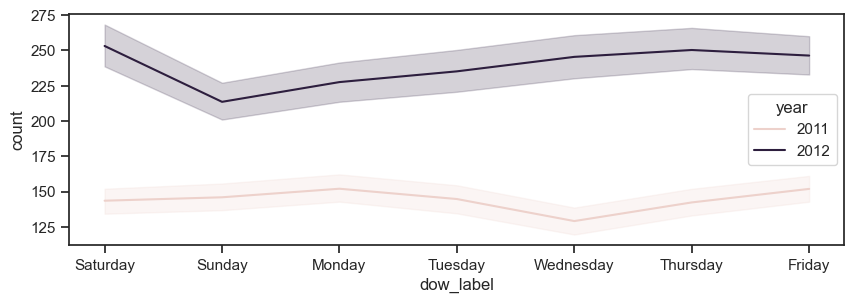

In [35]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=bike,
              x='dow_label',
              y='count',
              hue='year')

### Rentals in relation to tempature

<Axes: xlabel='temp', ylabel='count'>

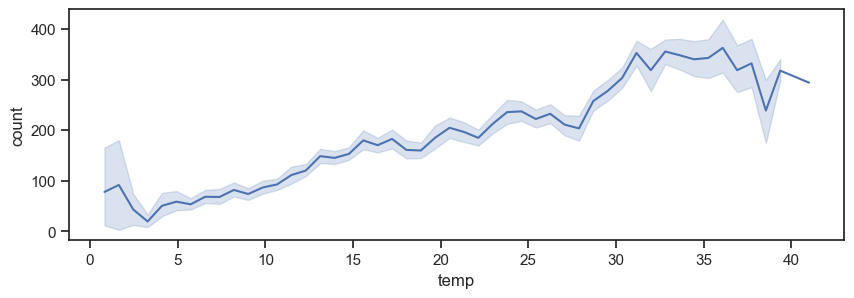

In [23]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=bike, x="temp", y="count")


### Rentals in different weather on seasons

<Axes: xlabel='season', ylabel='count'>

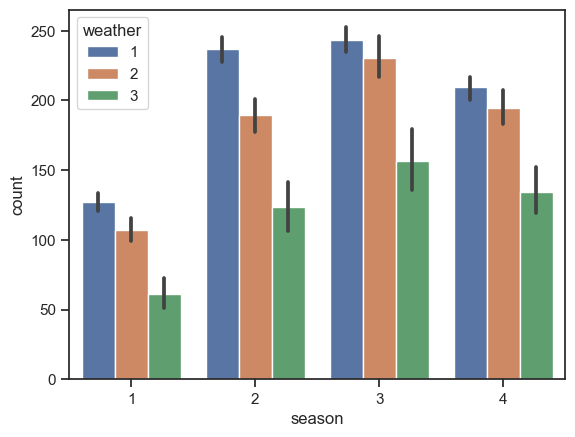

In [25]:
sns.barplot(data = bike, x = "season", y = "count", hue = "weather")

In [40]:
oneday = bike["2011-01-06":"2011-01-07"]
oneday

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dow_label,day_of_week,year,month,day,hour
datetime,,,,,,,,,,,,,,,,,
2011-01-06 00:00:00,1,0,1,1,7.38,12.120,55,0.0000,0,11,11,Thursday,4,2011,1,6,0
2011-01-06 01:00:00,1,0,1,1,6.56,11.365,64,0.0000,0,4,4,Thursday,4,2011,1,6,1
2011-01-06 02:00:00,1,0,1,1,6.56,11.365,64,0.0000,0,2,2,Thursday,4,2011,1,6,2
2011-01-06 04:00:00,1,0,1,2,6.56,9.850,64,6.0032,0,1,1,Thursday,4,2011,1,6,4
2011-01-06 05:00:00,1,0,1,2,5.74,9.090,69,6.0032,0,4,4,Thursday,4,2011,1,6,5
2011-01-06 06:00:00,1,0,1,2,5.74,8.335,63,7.0015,0,36,36,Thursday,4,2011,1,6,6
2011-01-06 07:00:00,1,0,1,2,6.56,11.365,59,0.0000,0,95,95,Thursday,4,2011,1,6,7
2011-01-06 08:00:00,1,0,1,1,6.56,11.365,59,0.0000,3,216,219,Thursday,4,2011,1,6,8
2011-01-06 09:00:00,1,0,1,2,7.38,12.120,51,0.0000,6,116,122,Thursday,4,2011,1,6,9


/var/folders/qs/2gryg53s7px3dv5fcj09lsl40000gn/T/ipykernel_24402/3143554812.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  daily.set_xticklabels(daily.get_xticklabels(), rotation=40, ha="right")


[Text(14980.0, 0, '01-06 00'),
 Text(14980.25, 0, '01-06 06'),
 Text(14980.5, 0, '01-06 12'),
 Text(14980.75, 0, '01-06 18'),
 Text(14981.0, 0, '01-07 00'),
 Text(14981.25, 0, '01-07 06'),
 Text(14981.5, 0, '01-07 12'),
 Text(14981.75, 0, '01-07 18'),
 Text(14982.0, 0, '01-08 00')]

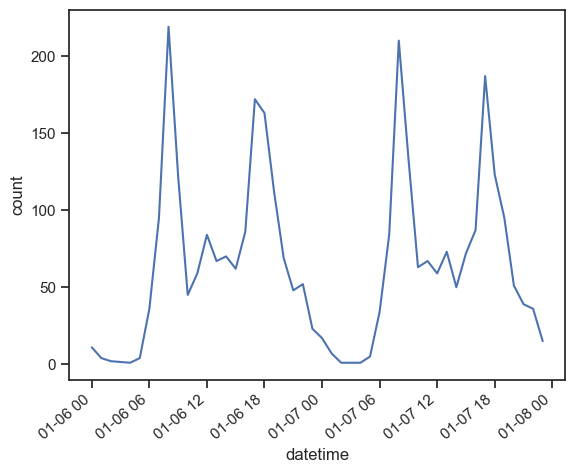

In [41]:
daily = sns.lineplot(oneday["count"])
daily.set_xticklabels(daily.get_xticklabels(), rotation=40, ha="right")